<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte integración


In [ ]:
#Punto 24

In [ ]:
#Punto 26
 # (e)

def funcion(x):
  return x**3
a=0
b=2

def integral(n):
  roots, weights = np.polynomial.legendre.leggauss(n)
  t=0.5*((b-a)*roots+a+(b-a))
  return (b-a)/2*np.sum(weights*funcion(t))

In [ ]:
integral(30)

4.0000000000000115

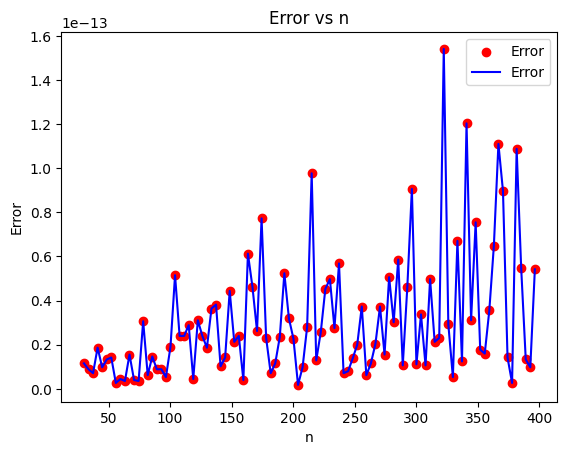

In [ ]:
# (f)
Exacta = 4
n=np.linspace(30,400,100, endpoint=False)
n_int=n.astype(int)
Estimada = np.array([integral(ni) for ni in n_int])

Error = abs(Exacta - Estimada)

plt.scatter(n,Error, label='Error', color='r')
plt.plot(n,Error, label='Error', color='b')
plt.title('Error vs n')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#(g)

"""La suma de Riemann no es una buena estrategia para estimación de integrales si la comparamos como
los métodos de cuadratura de gauss, pues, para que la suma de Riemann converja al valor de la integral, el
valor de n debe ser muy grande, mientras que para que las cuadraturas de gauss converjan al valor de la
integral, no  hace falta que el valor de n sea grande."""


In [ ]:
# Punto 27
import time

G8=(lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**0 + w1*x1**0 + w2*x2**0 + w3*x3**0 -2, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**1 + w1*x1**1 + w2*x2**1 + w3*x3**1, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**2 + w1*x1**2 + w2*x2**2 + w3*x3**2 -2/3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**3 + w1*x1**3 + w2*x2**3 + w3*x3**3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**4 + w1*x1**4 + w2*x2**4 + w3*x3**4 -2/5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**5 + w1*x1**5 + w2*x2**5 + w3*x3**5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**6 + w1*x1**6 + w2*x2**6 + w3*x3**6 -2/7,\
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**7 + w1*x1**7 + w2*x2**7 + w3*x3**7,)

def GetF(f,r):

  dim = len(f)
  v = np.zeros(dim)

  for i in range(dim):
    v[i] = f[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])

  return v

def GetJacobian8(f, r, h=1e-3):
    dim = len(r)
    J = np.zeros((len(f), dim))

    for i in range(len(f)):
        for j in range(dim):
            dr = np.zeros(dim)
            dr[j] = h

            J[i, j] = (f[i](r[0]+dr[0],r[1]+dr[1],r[2]+dr[2],r[3]+dr[3],r[4]+dr[4],r[5]+dr[5],r[6]+dr[6],r[7]+dr[7]) - \
                       f[i](r[0]-dr[0],r[1]-dr[1],r[2]-dr[2],r[3]-dr[3],r[4]-dr[4],r[5]-dr[5],r[6]-dr[6],r[7]-dr[7])) / (2*h)
    return J.T

def GetMetric8(f,r):
  v=GetF(f,r)
  return 0.5*np.linalg.norm(v)**2

def descenso(f, r, lr, epoch, err):


  r=r.astype(np.float64)

  d=1
  it=0
  Vector = np.array([])
  R_vector = np.array(r)

  while d>err and it<epoch:

    Current = GetMetric8(f,r)
    J = GetJacobian8(f,r)
    Gvector = GetF(f,r)

    r-= lr*np.dot(J,Gvector)
    R_vector = np.vstack((R_vector,r))
    New=GetMetric8(f,r)
    Vector=np.append(Vector,New)
    d=abs(Current-New)/New

    if it%500==0:
      time.sleep(0.01)

    it+=1

  return r,it

In [ ]:
sol=descenso(G8,np.random.uniform(-1.,1.,size=8),0.01,100000,1e-4)
sol

(array([ 0.53923137,  0.05350543,  0.5020755 ,  0.90436219, -0.79058237,
         0.24473436,  0.8031961 ,  0.01229379]),
 4394)

In [ ]:
f=lambda x: np.cos(x)
I = np.sum(sol[0][:4] * f(sol[0][4:]))
I

1.684163691522904

Parte álgebra lineal


In [ ]:
#Punto 24

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

# Definir el vector de cuotas C
C = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
Ca = 1_000_000  # Capital total

# Función de retorno
def Return(w, Ca=Ca, C=C):
    elementwise_product = w * C
    result = elementwise_product - 1
    return_investment = Ca * result
    return np.min(return_investment)

# Clase del robot
class Robot:

    def __init__(self, f, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.Fitness = -np.inf  # Empezamos con un fitness bajo (retorno negativo)
        self.f = f  # Función a minimizar
        self.r = np.random.uniform(0., 1., size=C.shape[0])  # Generar pesos iniciales aleatorios
        self.r = self.r / np.sum(self.r)  # Normalizar para que sumen 1

    def Mutate(self):
        self.r += np.random.normal(loc=0., scale=self.rate, size=C.shape[0])
        self.r = np.abs(self.r)  # Evitar valores negativos
        self.r = self.r / np.sum(self.r)  # Normalizar para que sumen 1

    def GetR(self):
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(self.GetR())
        if self.Fitness > 3_250_000:  # Ajustar el umbral para ajustar la tasa de mutación
            self.rate = 0.01

    def GetFitness(self):
        return self.Fitness

def GetRobots(N):
    Robots = []
    for i in range(N):
        r = Robot(f=Return, Id=i)
        Robots.append(r)
    return Robots

def Genetic(Robots, epochs=500):

    N = int(0.5 * len(Robots))
    Fitness = np.array([])

    for e in range(int(epochs)):
        for p in Robots:
            p.Mutate()
            p.SetFitness()
        scores = [(p.Fitness, p) for p in Robots]
        scores.sort(key=lambda x: x[0], reverse=True)
        Temp = [r[1] for i, r in enumerate(scores) if i < N]
        for i, r in enumerate(Robots):
            j = i % N
            Robots[i] = copy.deepcopy(Temp[j])
        Fitness_ = [r.GetFitness() for r in Robots]
        Fitness = np.append(Fitness, np.mean(Fitness_))
        best_robot = Robots[0]
        print(f"Época {e}: Mejor retorno {best_robot.GetFitness():.2f} con vector de ponderación: {best_robot.GetR()}")

        if Fitness[-1] > 3_500_000:
            print('Entrenamiento terminado')
            break

        # Visualización cada 10 épocas
        if e % 10 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title('Epoch={:.0f}'.format(e))
            plt.scatter(range(len(Robots)), [p.GetFitness() for p in Robots], color='r')
            plt.xlabel('Robots')
            plt.ylabel('Fitness (Retorno mínimo)')

            plt.subplot(1, 2, 2)
            plt.plot(Fitness, color='k')
            plt.title('Fitness function')
            plt.xlabel('Epoch')
            plt.ylabel('Average Fitness')
            plt.show()

    # Imprimir el mejor robot al final del entrenamiento
    print(f"Mejor retorno final {best_robot.GetFitness():.2f} con vector de ponderación final: {best_robot.GetR()}")

# Inicializar los robots
Robots = GetRobots(200)

# Ejecutar el algoritmo genético
Genetic(Robots)


KeyboardInterrupt: 